In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('C:/Users/USER/Desktop/진행중/FEMS/datamart/HS_DataMart_v1.0.csv',encoding='cp949')

### data preprocessing

In [2]:
data=data.drop(['Unnamed: 0'], axis=1)
data['datetime']=pd.to_datetime(data['datetime'])
#train,test split

from math import floor
def train_test_split_df(df, test_size):
  # TODO: test_size(0 < test_size < 1) 비율에 따라 테스트/학습 데이터프레임으로 나누어 반환
  div = floor(df.shape[0] * (1 - test_size))
  return df.loc[:div], df.loc[div + 1:]

train_df, test_df = train_test_split_df(data, 0.20)
print('Train data :',train_df['datetime'].min(),' ~ ',train_df['datetime'].max(),'(',len(train_df),')')
print('Test data :',test_df['datetime'].min(),' ~ ',test_df['datetime'].max(),'(',len(test_df),')')



Train data : 2022-04-26 00:00:00  ~  2022-06-01 09:00:00 ( 3493 )
Test data : 2022-06-01 09:15:00  ~  2022-06-10 11:15:00 ( 873 )


#feature engineering
1. (비정상) column downtime 제거  (209개 제거됨)   
2. datetime을 feature(mon,day,hour,min,weekday)화    

 *  feature :    
    1. 'TURNING ROLL 보류율',    
    2. '사이로 백수 온도',
    3. 'TURNING ROLL_WIRE 진공도 토탈',     
    4. 'TURNING ROLL 속도',    
    5. 'CENTER NO2 ROLL 속도',     
    6. '1군 DRYER 속도',   
    7. 'NO8 DRYER 속도',    
    8. 'CALENDER BTM ROLL속도',    
    9. 'PM23_평량',    
    10. 'PM23_릴속도'



In [3]:
#1.  (비정상) column downtime 제거   
# '(비정상)지절시 운전' : 1을 제거
# '(비정상)카렌더 SHEET BREAK SENSOR TAG' : 1을 제거
# '(비정상)PICK-UP VACCUM 파괴 밸브 TAG' : 0을 제거
train_df['(비정상)지절시 운전']=train_df['(비정상)지절시 운전'].astype(str)
train_df['(비정상)카렌더 SHEET BREAK SENSOR TAG']=train_df['(비정상)카렌더 SHEET BREAK SENSOR TAG'].astype(str)
train_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG']=train_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG'].astype(str)

train_df=train_df[train_df['(비정상)지절시 운전'] == '0.0']   
train_df=train_df[train_df['(비정상)카렌더 SHEET BREAK SENSOR TAG'] == '0.0']
train_df=train_df[train_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG'] == '1.0']
train_df.info()
print('Train data :',train_df['datetime'].min(),' ~ ',train_df['datetime'].max(),'(',len(train_df),')')

#===================================================================================================
test_df['(비정상)지절시 운전']=test_df['(비정상)지절시 운전'].astype(str)
test_df['(비정상)카렌더 SHEET BREAK SENSOR TAG']=test_df['(비정상)카렌더 SHEET BREAK SENSOR TAG'].astype(str)
test_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG']=test_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG'].astype(str)

test_df=test_df[test_df['(비정상)지절시 운전'] == '0.0']   
test_df=test_df[test_df['(비정상)카렌더 SHEET BREAK SENSOR TAG'] == '0.0']
test_df=test_df[test_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG'] == '1.0']
test_df.info()
print('Test data :',test_df['datetime'].min(),' ~ ',test_df['datetime'].max(),'(',len(test_df),')')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3349 entries, 0 to 3492
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   datetime                         3349 non-null   datetime64[ns]
 1   초지_전력사용량                         3349 non-null   float64       
 2   Press_전력사용량                      3349 non-null   float64       
 3   Constant_전력사용량                   3349 non-null   float64       
 4   Wire_전력사용량                       3349 non-null   float64       
 5   AIR_전력사용량                        3349 non-null   float64       
 6   Size_전력사용량                       3349 non-null   float64       
 7   Calender_전력사용량                   3349 non-null   float64       
 8   Drive_전력사용량                      3349 non-null   float64       
 9   Pre-Dryer_전력사용량                  3349 non-null   float64       
 10  After-Dryer_전력사용량                3349 non-null   float64    

C:\Users\USER\AppData\Local\Temp\ipykernel_8764\4252133469.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['(비정상)지절시 운전']=train_df['(비정상)지절시 운전'].astype(str)
C:\Users\USER\AppData\Local\Temp\ipykernel_8764\4252133469.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['(비정상)카렌더 SHEET BREAK SENSOR TAG']=train_df['(비정상)카렌더 SHEET BREAK SENSOR TAG'].astype(str)
C:\Users\USER\AppData\Local\Temp\ipykernel_8764\4252133469.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [4]:
train_features=train_df[['datetime',
'TURNING ROLL 보류율',
'사이로 백수 온도',
'TURNING ROLL_WIRE 진공도 토탈',
'TURNING ROLL 속도',
 'CENTER NO2 ROLL 속도',
 '1군 DRYER 속도',
 'NO8 DRYER 속도',
 'CALENDER BTM ROLL속도',
 'PM23_평량',
 'PM23_릴속도']]
train_target=train_df['초지_전력사용량']

test_features=test_df[['datetime', 
'TURNING ROLL 보류율',
'사이로 백수 온도',
'TURNING ROLL_WIRE 진공도 토탈',
'TURNING ROLL 속도',
 'CENTER NO2 ROLL 속도',
 '1군 DRYER 속도',
 'NO8 DRYER 속도',
 'CALENDER BTM ROLL속도',
 'PM23_평량',
 'PM23_릴속도']]
test_target=test_df['초지_전력사용량']

In [5]:
#2. datetime을 feature(mon,day,hour,min,weekday)화  
train_features['mon']=train_features['datetime'].dt.month
train_features['day']=train_features['datetime'].dt.day
train_features['hour']=train_features['datetime'].dt.hour
train_features['min']=train_features['datetime'].dt.minute
train_features['weekday']=train_features['datetime'].dt.weekday
train_features=train_features.drop(['datetime'], axis=1)


#2. datetime을 feature(mon,day,hour,min,weekday)화  
test_features['mon']=test_features['datetime'].dt.month
test_features['day']=test_features['datetime'].dt.day
test_features['hour']=test_features['datetime'].dt.hour
test_features['min']=test_features['datetime'].dt.minute
test_features['weekday']=test_features['datetime'].dt.weekday
testtest=test_features   #추후 시각화용 (use datetime)
test_features=test_features.drop(['datetime'], axis=1)

C:\Users\USER\AppData\Local\Temp\ipykernel_8764\1082184899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['mon']=train_features['datetime'].dt.month
C:\Users\USER\AppData\Local\Temp\ipykernel_8764\1082184899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['day']=train_features['datetime'].dt.day
C:\Users\USER\AppData\Local\Temp\ipykernel_8764\1082184899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [6]:
# Convert to numpy arrays
training_features = np.array(train_features)
# Sklearn wants the labels as one-dimensional vectors
training_targets = np.array(train_target).reshape((-1,))


testing_features = np.array(test_features)
testing_targets = np.array(test_target).reshape((-1,))

### fit TPOT (train 80%,tpot all)

In [17]:
# Import the tpot regressor
from tpot import TPOTRegressor
# Create a tpot object with a few parameters
tpot_all = TPOTRegressor(scoring = 'neg_mean_absolute_error',
                    n_jobs = -1,
                    verbosity = 2,
                    cv = 5) 

In [18]:
# Fit the tpot model on the training data
tpot_all.fit(training_features, training_targets)
# Export the pipeline as a python script file
tpot_all.export('C:/Users/USER/Desktop/진행중/FEMS/test_model/tpot_exported_pipeline_regression_hansol_choji_220711_training80_try2.py')

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -61.14746323797565

Generation 2 - Current best internal CV score: -60.64293682220334

Generation 3 - Current best internal CV score: -60.64293682220334

Generation 4 - Current best internal CV score: -60.64293682220334

Generation 5 - Current best internal CV score: -60.57027638598417

Generation 6 - Current best internal CV score: -60.57027638598417

Generation 7 - Current best internal CV score: -60.57027638598417

Generation 8 - Current best internal CV score: -60.57027638598417

Generation 9 - Current best internal CV score: -60.03392891941189

Generation 10 - Current best internal CV score: -60.03392891941189

Generation 11 - Current best internal CV score: -59.930391694490346

Generation 12 - Current best internal CV score: -59.841693191869

Generation 13 - Current best internal CV score: -59.78848267828933

Generation 14 - Current best internal CV score: -59.78848267828933

Generation 15 - Current best internal CV score: -59.78848

In [44]:
print(tpot_all.score(testing_features, testing_targets))

Imputing missing values in feature set
-89.01791896661263


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


### pipeline(From.TPOT) : SVR(train 80%,tpot all)

In [46]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.svm import LinearSVR
from tpot.builtins import StackingEstimator
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from copy import copy

# # NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
# features = tpot_data.drop('target', axis=1)
# training_features, testing_features, training_target, testing_target = \
#             train_test_split(features, tpot_data['target'], random_state=None)

imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
training_features = imputer.transform(training_features)
# testing_features = imputer.transform(testing_features)

# Average CV score on the training set was: -58.23227059370579
exported_pipeline = make_pipeline(
    make_union(
        FunctionTransformer(copy),
        PCA(iterated_power=6, svd_solver="randomized")
    ),
    LinearSVR(C=0.0001, dual=True, epsilon=0.01, loss="epsilon_insensitive", tol=0.1)
)

model2=exported_pipeline.fit(training_features, training_targets)



In [48]:
model2

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer',
                                                 FunctionTransformer(func=<function copy at 0x00000299F2E263A0>)),
                                                ('pca',
                                                 PCA(iterated_power=6,
                                                     svd_solver='randomized'))])),
                ('linearsvr', LinearSVR(C=0.0001, epsilon=0.01, tol=0.1))])

In [49]:
# model save to disk
import pickle
filename = 'C:/Users/USER/Desktop/진행중/FEMS/test_model/TPOT_regressor_model_hansol_choji_train80.sav'
pickle.dump(model2, open(filename, 'wb'))

In [9]:
# load the model from disk
import pickle
from sklearn.impute import SimpleImputer
filename = 'C:/Users/USER/Desktop/진행중/FEMS/test_model/TPOT_regressor_model_hansol_choji_train80.sav'
loaded_model = pickle.load(open(filename, 'rb'))
#testing_feautrues imputing
imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
testing_features = imputer.transform(testing_features)

#predict
results_f = loaded_model.predict(testing_features)
def SMAPE(y_true, y_pred):
    return np.mean( (np.abs(y_true-y_pred)) / ((np.abs(y_true) + np.abs(y_pred))/2) ) * 100
SMAPE(testing_targets,results_f)

3.41208248340217

Text(0.5, 0, 'Date')

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


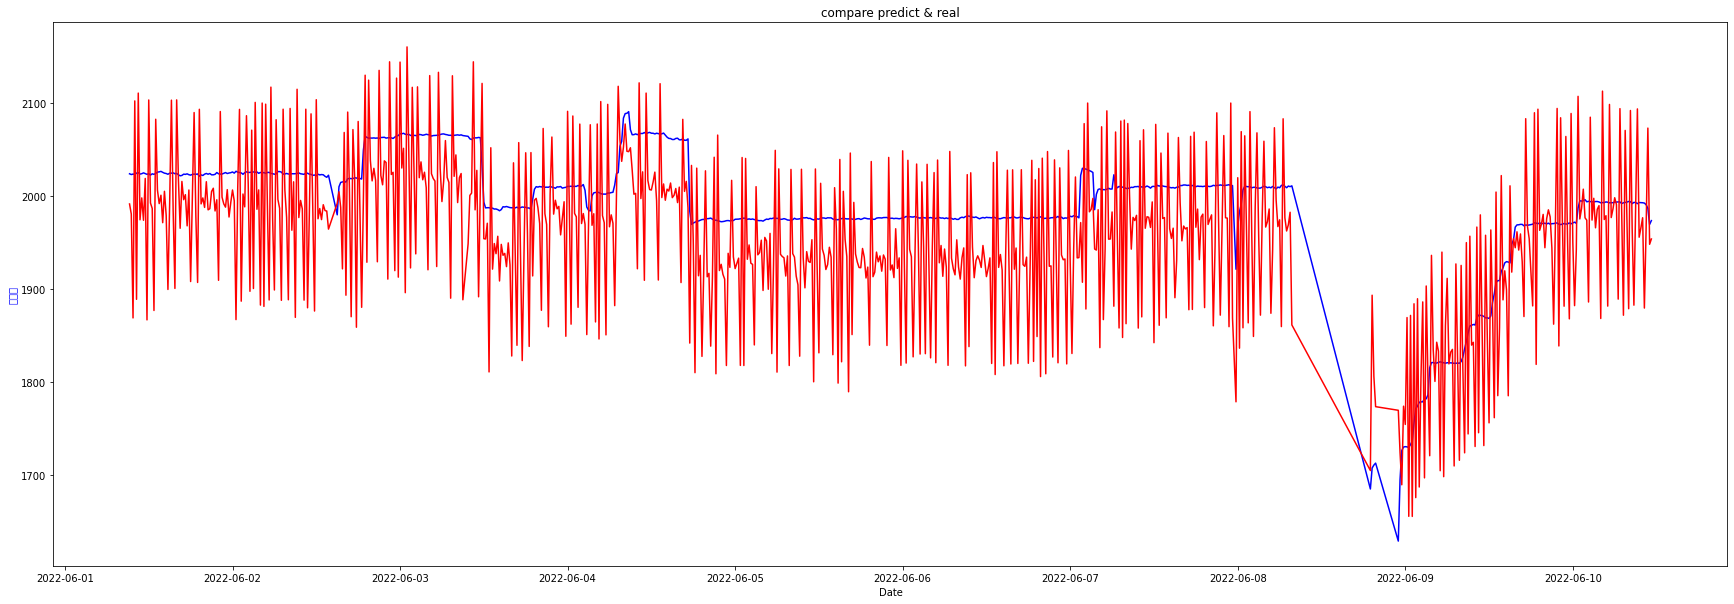

In [11]:
  
#result 시각화
dd=testtest['datetime']
dd=pd.merge(dd,test_df,on=['datetime'],how='left')
dd=dd[['datetime','초지_전력사용량']]
dd=dd.reset_index()
dd['predict']=pd.DataFrame(results_f)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(dd['datetime'],dd['predict'], 'b')
plt.plot(dd['datetime'],dd['초지_전력사용량'], 'r')
plt.ylabel('사용량', color='blue')
plt.title('compare predict & real')
plt.xlabel('Date')

### pipeline(From.TPOT) : Xgboost(test 소수)

In [17]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFwe, SelectPercentile, f_regression
from sklearn.linear_model import LassoLarsCV, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer

# # NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
# features = tpot_data.drop('target', axis=1)
# training_features, testing_features, training_target, testing_target = \
#             train_test_split(features, tpot_data['target'], random_state=None)

imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
training_features = imputer.transform(training_features)


# Average CV score on the training set was: -57.74154519861288
exported_pipeline = make_pipeline(
    SelectPercentile(score_func=f_regression, percentile=49),
    SelectFwe(score_func=f_regression, alpha=0.043000000000000003),
    MinMaxScaler(),
    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
    StackingEstimator(estimator=SGDRegressor(alpha=0.01, eta0=0.01, fit_intercept=True, l1_ratio=1.0, learning_rate="invscaling", loss="squared_loss", penalty="elasticnet", power_t=1.0)),
    XGBRegressor(learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.6500000000000001, verbosity=0)
)

model=exported_pipeline.fit(training_features, training_targets)



c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


In [24]:
model     # Stacking Ensemble : cv기반 Stacking ensemble

Pipeline(steps=[('selectpercentile',
                 SelectPercentile(percentile=49,
                                  score_func=<function f_regression at 0x00000299980A5D30>)),
                ('selectfwe',
                 SelectFwe(alpha=0.043000000000000003,
                           score_func=<function f_regression at 0x00000299980A5D30>)),
                ('minmaxscaler', MinMaxScaler()),
                ('stackingestimator-1',
                 StackingEstimator(estimator=LassoLarsCV(normalize=True))),
                ('stacki...
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=1, max_leaves=0, min_child_weight=5,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=1, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [20]:
# model save to disk
import pickle
filename = 'C:/Users/USER/Desktop/진행중/FEMS/test_model/TPOT_regressor_model_hansol_choji.sav'
pickle.dump(model, open(filename, 'wb'))

In [12]:
# load the model from disk
filename = 'C:/Users/USER/Desktop/진행중/FEMS/test_model/TPOT_regressor_model_hansol_choji.sav'
loaded_model = pickle.load(open(filename, 'rb'))

#testing_feautrues imputing
imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
testing_features = imputer.transform(testing_features)

#predict
results_f = loaded_model.predict(testing_features)
def SMAPE(y_true, y_pred):
    return np.mean( (np.abs(y_true-y_pred)) / ((np.abs(y_true) + np.abs(y_pred))/2) ) * 100
SMAPE(testing_targets,results_f)

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


2.862018564143578

Text(0.5, 0, 'Date')

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


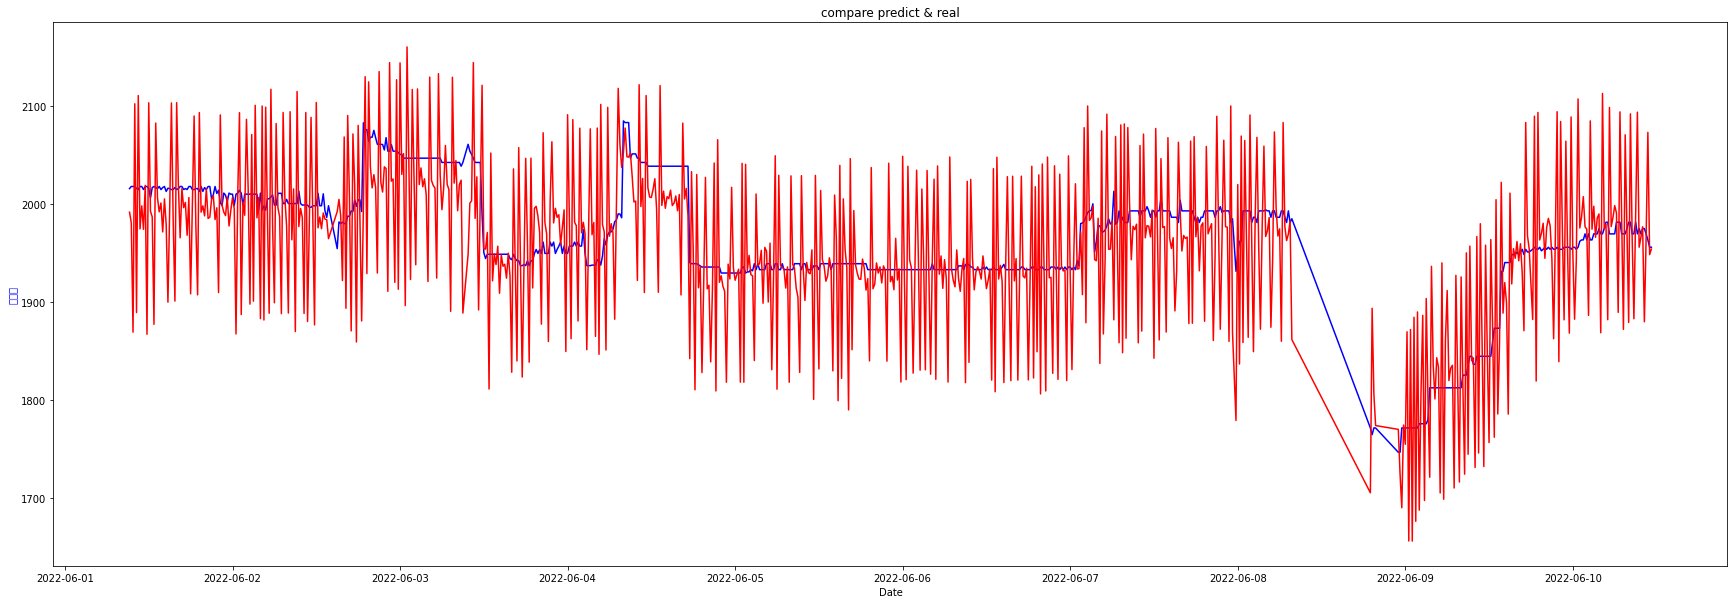

In [197]:
  
#result 시각화
dd=testtest['datetime']
dd=pd.merge(dd,test_df,on=['datetime'],how='inner')
dd=dd[['datetime','초지_전력사용량']]
dd=dd.reset_index()
dd['predict']=pd.DataFrame(results_f)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(dd['datetime'],dd['predict'], 'b')
plt.plot(dd['datetime'],dd['초지_전력사용량'], 'r')
plt.ylabel('사용량', color='blue')
plt.title('compare predict & real')
plt.xlabel('Date')

###  이상치 제거 후  & Custom scoring
초지_전력사용량 : 1280.5 < < 2264.4  (4개 차이임)       

Custom scoring : SMAPE

In [87]:
print('Train data before :',train_df['datetime'].min(),' ~ ',train_df['datetime'].max(),'(',len(train_df),')')
train_df=train_df[(train_df['초지_전력사용량'] > 1280.5 ) &(train_df['초지_전력사용량'] < 2264.4 ) ]   
print('Train data After :',train_df['datetime'].min(),' ~ ',train_df['datetime'].max(),'(',len(train_df),')')

Train data : 2022-04-26 00:00:00  ~  2022-06-01 09:00:00 ( 3349 )
Train data : 2022-04-26 00:00:00  ~  2022-06-01 09:00:00 ( 3345 )


In [88]:
#scoring SMAPE
from sklearn.metrics import make_scorer

def SMAPE(y_true, y_pred):
    return np.mean( (np.abs(y_true-y_pred)) / ((np.abs(y_true) + np.abs(y_pred))/2) ) * 100
my_custom_scorer = make_scorer(SMAPE, greater_is_better=True)

In [89]:
# Convert to numpy arrays
training_features = np.array(train_features)
# Sklearn wants the labels as one-dimensional vectors
training_targets = np.array(train_target).reshape((-1,))

In [90]:
# Import the tpot regressor
from tpot import TPOTRegressor
# Create a tpot object with a few parameters
tpot_all = TPOTRegressor(scoring = my_custom_scorer,
                    n_jobs = -1,
                    verbosity = 2,
                    cv = 5) 

In [92]:
# Fit the tpot model on the training data
tpot_all.fit(training_features, training_targets)
# Export the pipeline as a python script file
tpot_all.export('C:/Users/USER/Desktop/진행중/FEMS/test_model/tpot_exported_pipeline_regression_hansol_choji_220711_training80_customscore.py')

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 200.0

Generation 2 - Current best internal CV score: 200.0

Generation 3 - Current best internal CV score: 200.0

Generation 4 - Current best internal CV score: 200.0

Generation 5 - Current best internal CV score: 200.0

Generation 6 - Current best internal CV score: 200.0

Generation 7 - Current best internal CV score: 200.0

Generation 8 - Current best internal CV score: 200.0

Generation 9 - Current best internal CV score: 200.0

Generation 10 - Current best internal CV score: 200.0

Generation 11 - Current best internal CV score: 200.0

Generation 12 - Current best internal CV score: 200.0

Generation 13 - Current best internal CV score: 200.0

Generation 14 - Current best internal CV score: 200.0

Generation 15 - Current best internal CV score: 200.0

Generation 16 - Current best internal CV score: 200.0

Generation 17 - Current best internal CV score: 200.0

Generation 18 - Current best internal CV score: 200.0

Generation 19 - Cu

In [93]:
print(tpot_all.score(testing_features, testing_targets))

Imputing missing values in feature set
199.99999999998911


pipeline

In [94]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# # NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
# features = tpot_data.drop('target', axis=1)
# training_features, testing_features, training_target, testing_target = \
#             train_test_split(features, tpot_data['target'], random_state=None)

imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
training_features = imputer.transform(training_features)
testing_features = imputer.transform(testing_features)

# Average CV score on the training set was: 200.0
exported_pipeline = SGDRegressor(alpha=0.001, eta0=0.01, fit_intercept=False, l1_ratio=0.75, learning_rate="constant", loss="squared_loss", penalty="elasticnet", power_t=100.0)

model3=exported_pipeline.fit(training_features, training_targets)


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


In [96]:
model3

SGDRegressor(alpha=0.001, fit_intercept=False, l1_ratio=0.75,
             learning_rate='constant', loss='squared_loss',
             penalty='elasticnet', power_t=100.0)

In [98]:
# model save to disk
import pickle
filename = 'C:/Users/USER/Desktop/진행중/FEMS/test_model/TPOT_regressor_model_hansol_choji_customscore.sav'
pickle.dump(model3, open(filename, 'wb'))

In [182]:
# load the model from disk
filename = 'C:/Users/USER/Desktop/진행중/FEMS/test_model/TPOT_regressor_model_hansol_choji_customscore.sav'
loaded_model = pickle.load(open(filename, 'rb'))
results_f = loaded_model.predict(testing_features)
def SMAPE(y_true, y_pred):
    return np.mean( (np.abs(y_true-y_pred)) / ((np.abs(y_true) + np.abs(y_pred))/2) ) * 100
SMAPE(testing_targets,results_f)

199.9999999999919

Text(0.5, 0, 'Date')

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


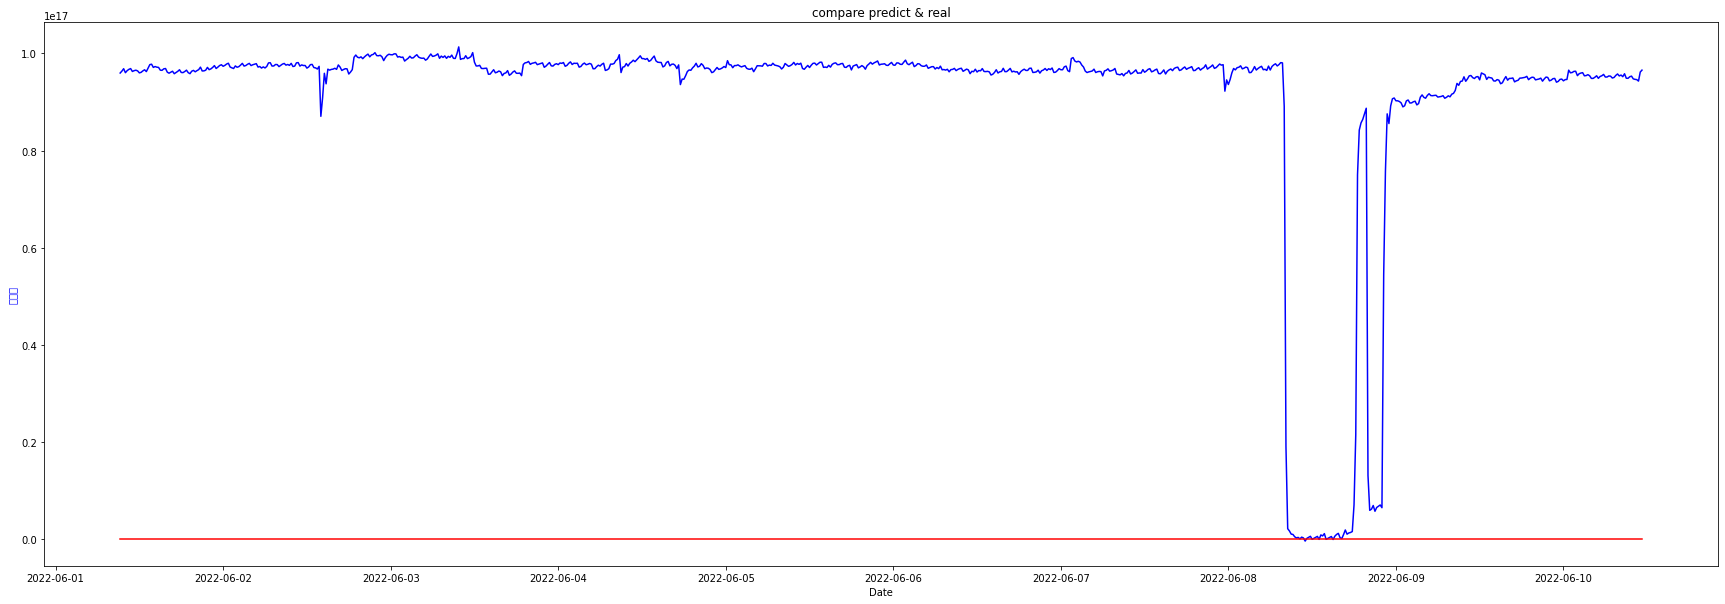

In [100]:
#result 시각화
dd=test_df[['datetime','초지_전력사용량']]
dd=dd.reset_index()
dd['predict']=pd.DataFrame(results_f)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(dd['datetime'],dd['predict'], 'b')
plt.plot(dd['datetime'],dd['초지_전력사용량'], 'r')
plt.ylabel('사용량', color='blue')
plt.title('compare predict & real')
plt.xlabel('Date')

# TPOT light

In [24]:
# Import the tpot regressor
from tpot import TPOTRegressor
# Create a tpot object with a few parameters
tpot_light = TPOTRegressor(scoring = 'neg_mean_absolute_error',
                    n_jobs = -1,
                    verbosity = 2,
                    cv = 5, config_dict= 'TPOT light') 

In [25]:
# Fit the tpot model on the training data
tpot_light.fit(training_features, training_targets)
# Export the pipeline as a python script file
tpot_light.export('C:/Users/USER/Desktop/진행중/FEMS/test_model/tpot_exported_pipeline_regression_hansol_choji_220712_training80_light.py')

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -58.84013949027127

Generation 2 - Current best internal CV score: -58.84013949027127

Generation 3 - Current best internal CV score: -58.84013949027127

Generation 4 - Current best internal CV score: -58.84013949027127

Generation 5 - Current best internal CV score: -58.84013949027127

Generation 6 - Current best internal CV score: -58.84013949027127

Generation 7 - Current best internal CV score: -58.84013949027127

Generation 8 - Current best internal CV score: -58.84013949027127

Generation 9 - Current best internal CV score: -58.84013949027127

Generation 10 - Current best internal CV score: -58.84013949027127

Generation 11 - Current best internal CV score: -58.84013949027127

Generation 12 - Current best internal CV score: -58.84013949027127

Generation 13 - Current best internal CV score: -58.84013949027127

Generation 14 - Current best internal CV score: -58.84013949027127

Generation 15 - Current best internal CV score: -58.8401

pipeline (TPOT light : SVR)

In [43]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFwe, f_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVR
from sklearn.impute import SimpleImputer

# # NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
# features = tpot_data.drop('target', axis=1)
# training_features, testing_features, training_target, testing_target = \
#             train_test_split(features, tpot_data['target'], random_state=None)

imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
training_features = imputer.transform(training_features)
testing_features = imputer.transform(testing_features)

# Average CV score on the training set was: -57.914946057455516
exported_pipeline = make_pipeline(
    SelectFwe(score_func=f_regression, alpha=0.044),
    LinearSVR(C=0.001, dual=True, epsilon=0.0001, loss="epsilon_insensitive", tol=0.1)
)

model_light=exported_pipeline.fit(training_features, training_targets)


In [54]:
model_light

Pipeline(steps=[('selectfwe',
                 SelectFwe(alpha=0.044,
                           score_func=<function f_regression at 0x000001246B16EF70>)),
                ('linearsvr', LinearSVR(C=0.001, epsilon=0.0001, tol=0.1))])

In [45]:
# model save to disk
import pickle
filename = 'C:/Users/USER/Desktop/진행중/FEMS/test_model/TPOT_regressor_model_hansol_choji_train80_light.sav'
pickle.dump(model_light, open(filename, 'wb'))

In [13]:
# load the model from disk
filename = 'C:/Users/USER/Desktop/진행중/FEMS/test_model/TPOT_regressor_model_hansol_choji_train80_light.sav'
loaded_model = pickle.load(open(filename, 'rb'))

#testing_feautrues imputing
imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
testing_features = imputer.transform(testing_features)

#predict
results_f = loaded_model.predict(testing_features)
def SMAPE(y_true, y_pred):
    return np.mean( (np.abs(y_true-y_pred)) / ((np.abs(y_true) + np.abs(y_pred))/2) ) * 100
SMAPE(testing_targets,results_f)

2.888633338446355

Text(0.5, 0, 'Date')

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


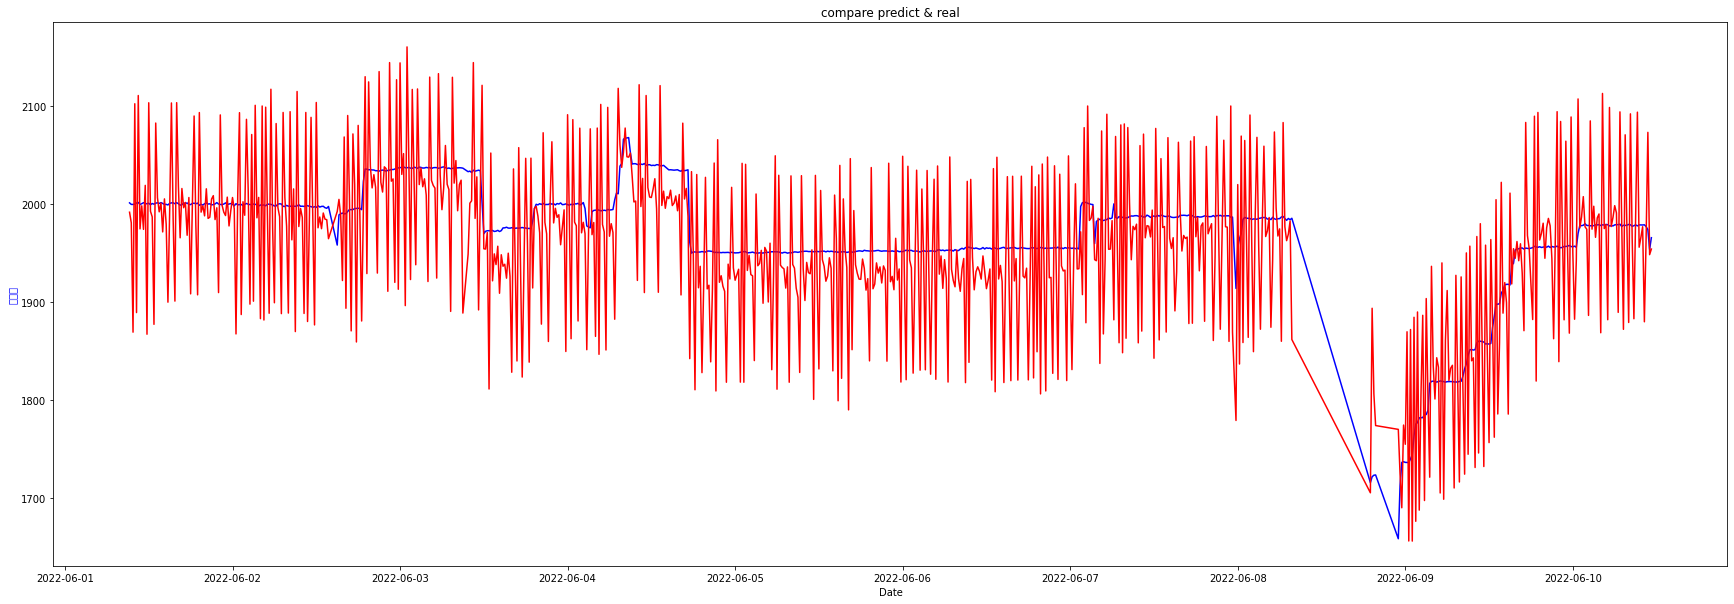

In [14]:
  
#result 시각화
dd=testtest['datetime']
dd=pd.merge(dd,test_df,on=['datetime'],how='inner')
dd=dd[['datetime','초지_전력사용량']]
dd=dd.reset_index()
dd['predict']=pd.DataFrame(results_f)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(dd['datetime'],dd['predict'], 'b')
plt.plot(dd['datetime'],dd['초지_전력사용량'], 'r')
plt.ylabel('사용량', color='blue')
plt.title('compare predict & real')
plt.xlabel('Date')